In [1]:
import pandas as pd
import math
import numpy as np

### read the csv and total no. of children

In [28]:
scans = pd.read_csv('scans.csv')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 1680


,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4


In [46]:
scans.describe()

,age,Years
count,1680.000000,1680.000000
mean,1398.369643,3.861905
std,263.351921,0.752190
min,914.000000,3.000000
25%,1166.000000,3.000000
50%,1406.000000,4.000000
75%,1621.250000,4.000000
max,2094.000000,6.000000


### getting the total of gender

female    845
male      835
Name: sex, dtype: int64


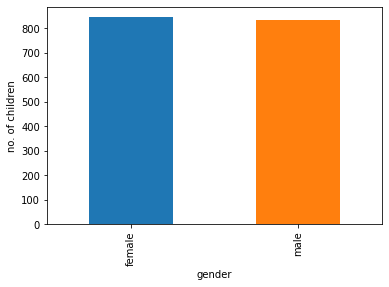

In [29]:
ax = scans['sex'].value_counts().plot(kind='bar')
ax.set_xlabel('gender')
ax.set_ylabel('no. of children')
print(scans['sex'].value_counts())

In [5]:
## function to convert the days into age
def age(row):
    in_years= row['age']/365
    return round(in_years)

In [48]:
#adding the Years column into dataframe
scans['Years'] = scans.apply(age,axis=1)
scans.head()

,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4


### plotting the bar graph no. of children against age

4    704
3    605
5    369
6      2
Name: Years, dtype: int64


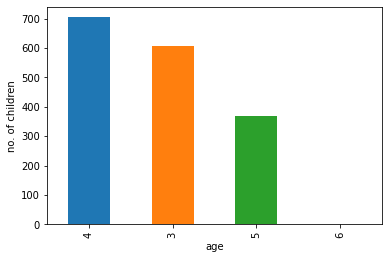

In [30]:
age_ax = scans['Years'].value_counts().plot(kind='bar')
age_ax.set_xlabel('age')
age_ax.set_ylabel('no. of children')
print(scans['Years'].value_counts())

### getting the distribition based on gender

In [31]:
male = scans[scans['sex']=='male']
print('No. of male distribution: ')
print(male['Years'].value_counts())

No. of male distribution: 
4    364
3    282
5    189
Name: Years, dtype: int64


In [32]:
female = scans[scans['sex']=='female']
print('No. of female distribution: ')
print(female['Years'].value_counts())

No. of female distribution: 
4    340
3    323
5    180
6      2
Name: Years, dtype: int64


### Reading the csv files and get the data at artifacts level

In [33]:
artifacts = pd.read_csv('artifacts.csv')
artifacts.head()

,artifacts,storage_path,qrcode,key,height,weight,muac
0,pc_1584997475-0195z663pl_1591588126306_100_000...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5
1,pc_1584997475-0195z663pl_1591588126306_100_001...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5
2,pc_1584997475-0195z663pl_1591588126306_100_002...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5
3,pc_1584997475-0195z663pl_1591588126306_100_003...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5
4,pc_1584997475-0195z663pl_1591588126306_100_004...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5


In [34]:
## dropping the null values from the artifacts 
artifacts  = artifacts.dropna()

In [47]:
artifacts.describe()

,key,height,weight,muac
count,42298.000000,42298.000000,42298.000000,42298.000000
mean,100.996548,93.752121,12.381007,14.250253
std,0.752257,7.029523,1.838878,1.020104
min,100.000000,58.300000,7.650000,11.500000
25%,100.000000,88.700000,11.100000,13.600000
50%,101.000000,93.600000,12.350000,14.200000
75%,102.000000,98.700000,13.550000,14.900000
max,102.000000,114.700000,19.000000,18.200000


In [35]:
print("Total no. of pointclouds:",len(artifacts ))

Total no. of pointclouds: 42298


101.0    18362
100.0    12041
102.0    11895
Name: key, dtype: int64


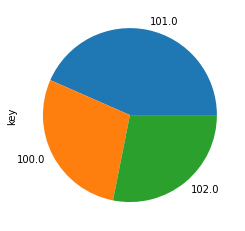

In [36]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
artifacts['key'].value_counts().plot(kind='pie')

### plotting the height and weight distribution

In [57]:
## fucntion to extract just the qrcode from them path
def extractqrcode(row):
    complete_path = row['storage_path']
    path = complete_path.split('/')
    qrcode = path[1]
    return qrcode

In [58]:
artifacts['qrcode'] = artifacts.apply(extractqrcode,axis=1)
artifacts.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584997475-0195z663pl_1591588126306_100_001...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
2,pc_1584997475-0195z663pl_1591588126306_100_002...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
3,pc_1584997475-0195z663pl_1591588126306_100_003...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
4,pc_1584997475-0195z663pl_1591588126306_100_004...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl


In [37]:
getheight = artifacts.drop_duplicates(subset=['qrcode']).reset_index(drop=True)
getheight.head()

,artifacts,storage_path,qrcode,key,height,weight,muac
0,pc_1584997475-0195z663pl_1591588126306_100_000...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5
1,pc_1584999865-01t0n240ra_1591629837700_100_008...,qrcode/1584999865-01t0n240ra/measure/159162983...,1584999865-01t0n240ra,100.0,86.5,12.45,13.1
2,pc_1583942091-02migjdla1_1591470015961_100_000...,qrcode/1583942091-02migjdla1/measure/159147001...,1583942091-02migjdla1,100.0,71.6,8.10,13.5
3,pc_1585011777-031jov4jpw_1591815240163_100_000...,qrcode/1585011777-031jov4jpw/measure/159181524...,1585011777-031jov4jpw,100.0,78.5,11.75,15.3
4,pc_1585003039-032hniw434_1591707933084_102_000...,qrcode/1585003039-032hniw434/measure/159170793...,1585003039-032hniw434,102.0,108.1,15.50,14.8


In [38]:
print("Total no.unique scans:", len(getheight))

Total no.unique scans: 1680


Text(0, 0.5, 'height')

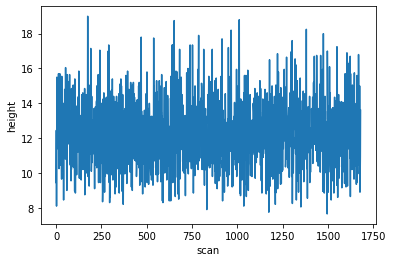

In [39]:
heightax = getheight['weight'].plot()
heightax.set_xlabel('scan')
heightax.set_ylabel('height')

Text(0.5, 0, 'weight')

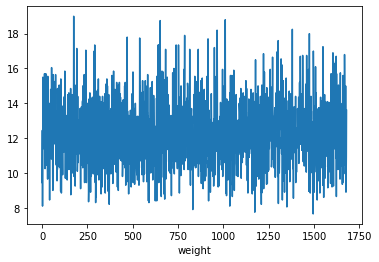

In [40]:
weightax = getheight['weight'].plot()
weightax.set_xlabel('scan')
weightax.set_xlabel('weight')

In [41]:
distribution_data = pd.merge(scans,getheight[['height','weight','muac','qrcode']],on='qrcode', how='left')
distribution_data.head()

,qrcode,person_id,age,sex,Years,height,weight,muac
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4,85.7,9.45,12.5
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4,86.5,12.45,13.1
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3,71.6,8.10,13.5
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3,78.5,11.75,15.3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4,108.1,15.50,14.8


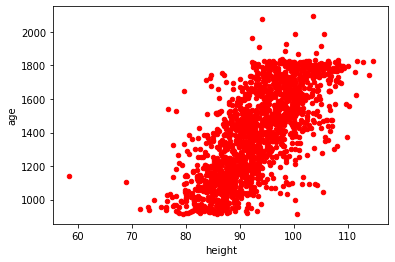

In [42]:
#distribution of height against age
heightvsage = distribution_data.plot.scatter(x='height',
                      y='age',
                      c='red')

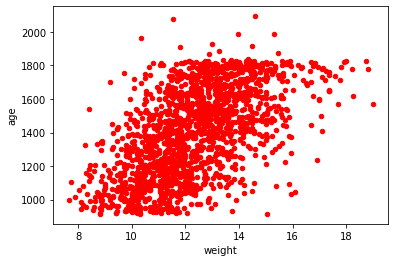

In [43]:
#distribution of weight against age
weightvsage = distribution_data.plot.scatter(x='weight',
                      y='age',
                      c='red')

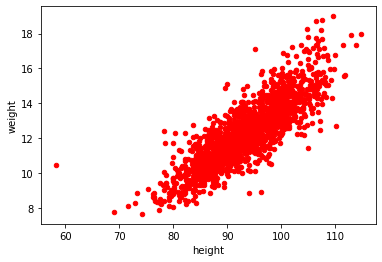

In [44]:
## distribution of height against weight
weightvsheight = distribution_data.plot.scatter(x='height',
                      y='weight',
                      c='red')

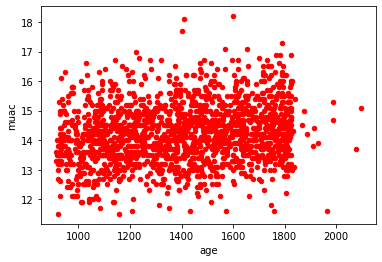

In [45]:
## distribution of age against weight
weightvsheight = distribution_data.plot.scatter(x='age',
                      y='muac',
                      c='red')

## Check on the amount of artifacts and scans from the dataset

In [67]:
from azureml.core import Workspace, Dataset
ws = Workspace.from_config()
dataset = Dataset.get_by_name(ws, name='anon-pcd-50k')
type(dataset)

azureml.data.file_dataset.FileDataset

In [68]:
mount_context = dataset.mount()
mount_context.start()  # this will mount the file streams
print(mount_context.mount_point)

/tmp/tmpu7rmyypu


In [69]:
import glob2
dataset = glob2.glob('/tmp/tmpu7rmyypu/qrcode/**/*.pcd')
len(dataset)

50149

In [70]:
print("Total no. of pointclouds in csv:",len(artifacts))
print("Total no. of pointclouds in dataset:",len(dataset))

Total no. of pointclouds in csv: 50149
Total no. of pointclouds in dataset: 50149


In [75]:
## extracting the qrcodes
qrcodes_data = []
for path in dataset:
    data =path.split('/')
    qrcodes_data.append(data[4])
qrc_dataframe = pd.DataFrame(qrcodes_data,columns=['qrcodes'])

In [83]:
print("Total no. of scans in dataset:",len(qrc_dataframe['qrcodes'].unique()))
print("Total no. of scans in csv:", len(scans))      

Total no. of scans in dataset: 2106
Total no. of scans in csv: 2106
